In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/playground-series-s4e7/sample_submission.csv
/kaggle/input/playground-series-s4e7/train.csv
/kaggle/input/playground-series-s4e7/test.csv


In [2]:
train = pd.read_csv('/kaggle/input/playground-series-s4e7/train.csv')
test = pd.read_csv('/kaggle/input/playground-series-s4e7/test.csv')
print('Size of train dataset: {} ____ Size of test dataset: {}'.format(train.shape,test.shape))
train.head()

Size of train dataset: (11504798, 12) ____ Size of test dataset: (7669866, 11)


,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,0,Male,21,1,35.0,0,1-2 Year,Yes,65101.0,124.0,187,0
1,1,Male,43,1,28.0,0,> 2 Years,Yes,58911.0,26.0,288,1
2,2,Female,25,1,14.0,1,< 1 Year,No,38043.0,152.0,254,0
3,3,Female,35,1,1.0,0,1-2 Year,Yes,2630.0,156.0,76,0
4,4,Female,36,1,15.0,1,1-2 Year,No,31951.0,152.0,294,0


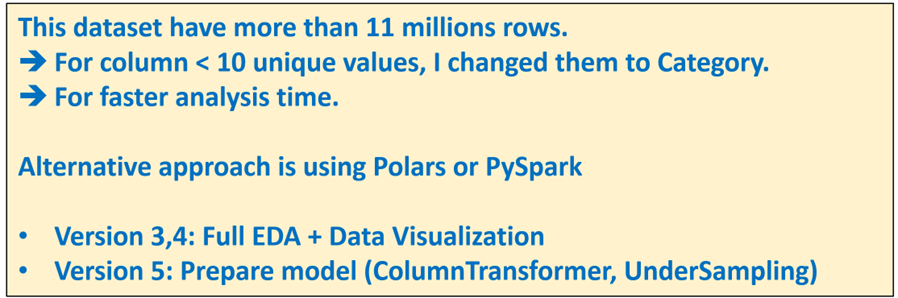

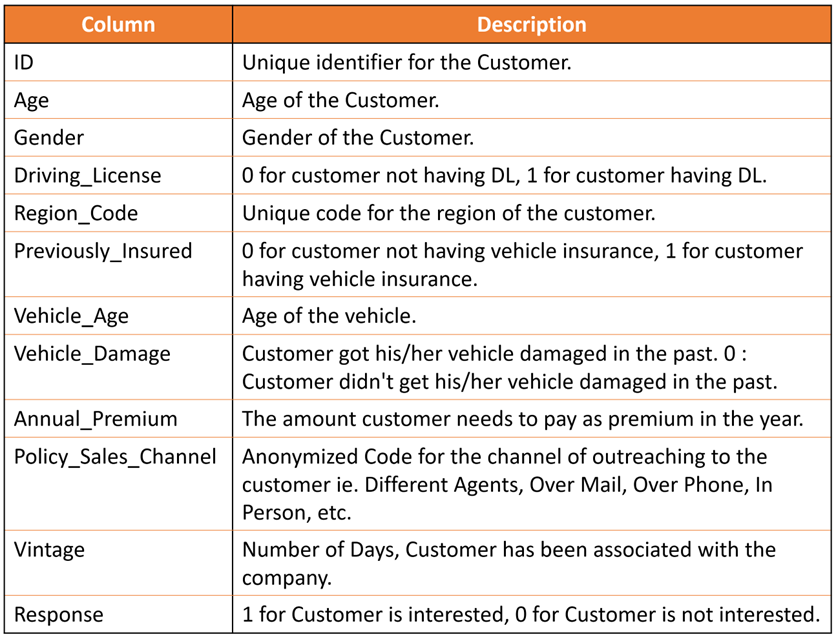

# Summary about the dataset:

In [3]:
train.describe().T

,count,mean,std,min,25%,50%,75%,max
id,11504798.0,5.752398e+06,3.321149e+06,0.0,2876199.25,5752398.5,8628597.75,11504797.0
Age,11504798.0,3.838356e+01,1.499346e+01,20.0,24.00,36.0,49.00,85.0
Driving_License,11504798.0,9.980220e-01,4.443120e-02,0.0,1.00,1.0,1.00,1.0
Region_Code,11504798.0,2.641869e+01,1.299159e+01,0.0,15.00,28.0,35.00,52.0
Previously_Insured,11504798.0,4.629966e-01,4.986289e-01,0.0,0.00,0.0,1.00,1.0
Annual_Premium,11504798.0,3.046137e+04,1.645475e+04,2630.0,25277.00,31824.0,39451.00,540165.0
Policy_Sales_Channel,11504798.0,1.124254e+02,5.403571e+01,1.0,29.00,151.0,152.00,163.0
Vintage,11504798.0,1.638977e+02,7.997953e+01,10.0,99.00,166.0,232.00,299.0
Response,11504798.0,1.229973e-01,3.284341e-01,0.0,0.00,0.0,0.00,1.0


In [4]:
# Define column
less = []
for i in train.columns[1:]:
    if train[i].nunique() < 10:
        less.append(i)
        
print('Column have LESS than 10 unique values: ', less)
print('Column have MORE than 10 unique values: ', [i for i in train.columns if i not in less])

Column have LESS than 10 unique values:  ['Gender', 'Driving_License', 'Previously_Insured', 'Vehicle_Age', 'Vehicle_Damage', 'Response']
Column have MORE than 10 unique values:  ['id', 'Age', 'Region_Code', 'Annual_Premium', 'Policy_Sales_Channel', 'Vintage']


In [5]:
# Change to categorical columns for faster analysis:
for i in less:
    train[i] = train[i].astype('category')
    
from pandas.api.types import CategoricalDtype

# Define the new order of categories
new_categories = ['< 1 Year', '1-2 Year', '> 2 Years']

# Create a new CategoricalDtype with the desired order
new_dtype = CategoricalDtype(categories=new_categories, ordered=True)

# Update the 'Vehicle_Age' column with the new dtype
train['Vehicle_Age'] = train['Vehicle_Age'].astype(new_dtype)

In [6]:
train["Vehicle_Age"].dtype

CategoricalDtype(categories=['< 1 Year', '1-2 Year', '> 2 Years'], ordered=True, categories_dtype=object)

In [7]:
for p in ax[0].patches:
        percentage = f'{100 * p.get_height() / total:.2f}%'
        x = p.get_x() + p.get_width() / 2
        y = p.get_height() + 30 
        print(p.get_x)

NameError: name 'ax' is not defined

# Data Visualization:

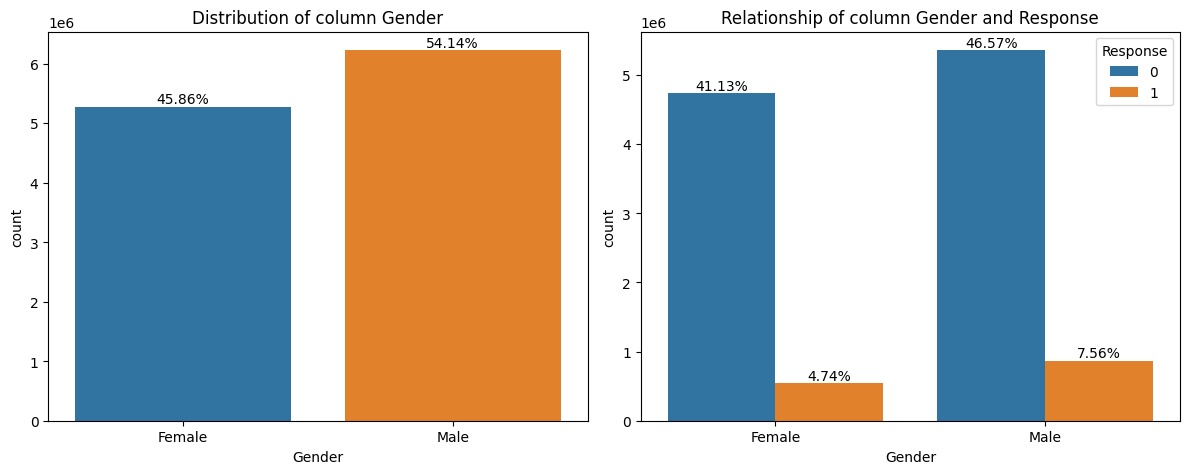

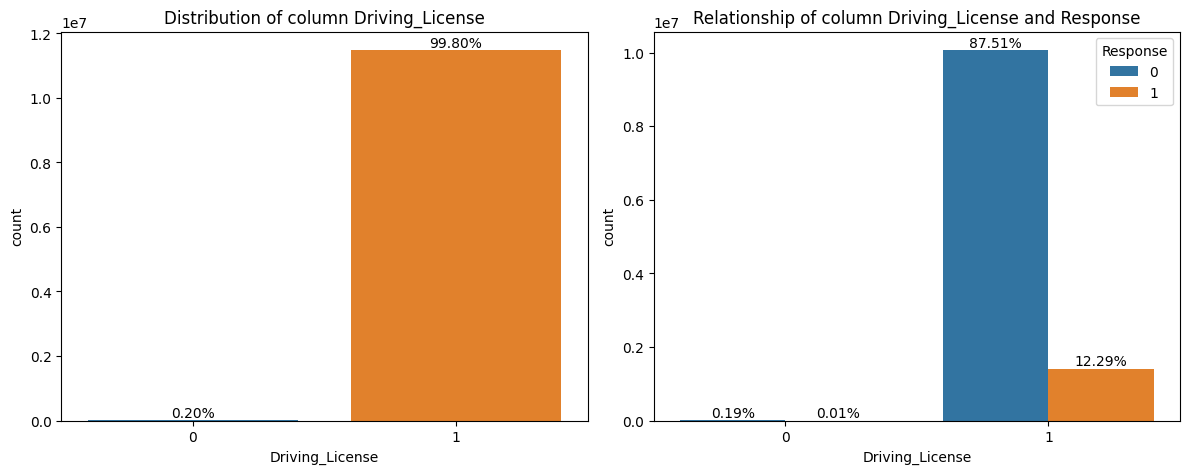

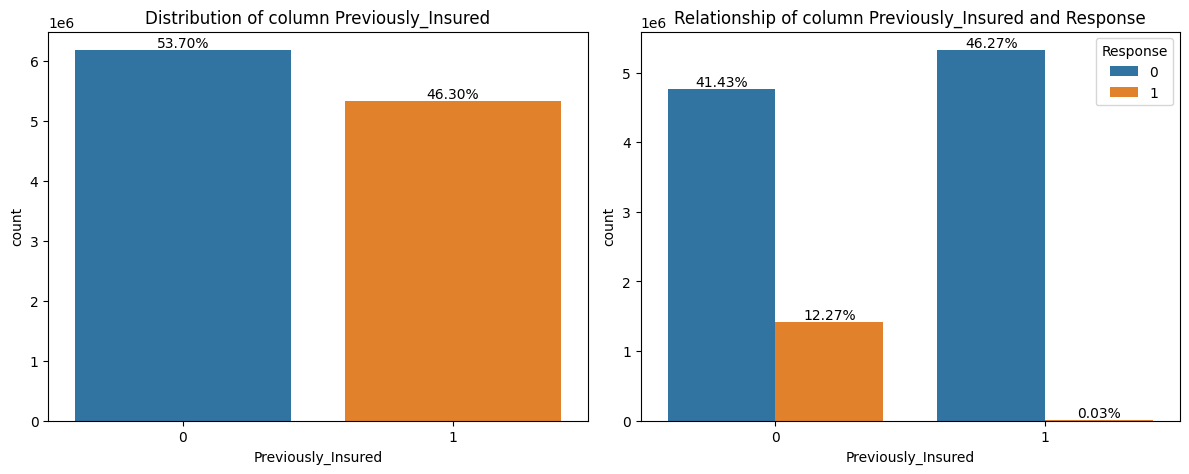

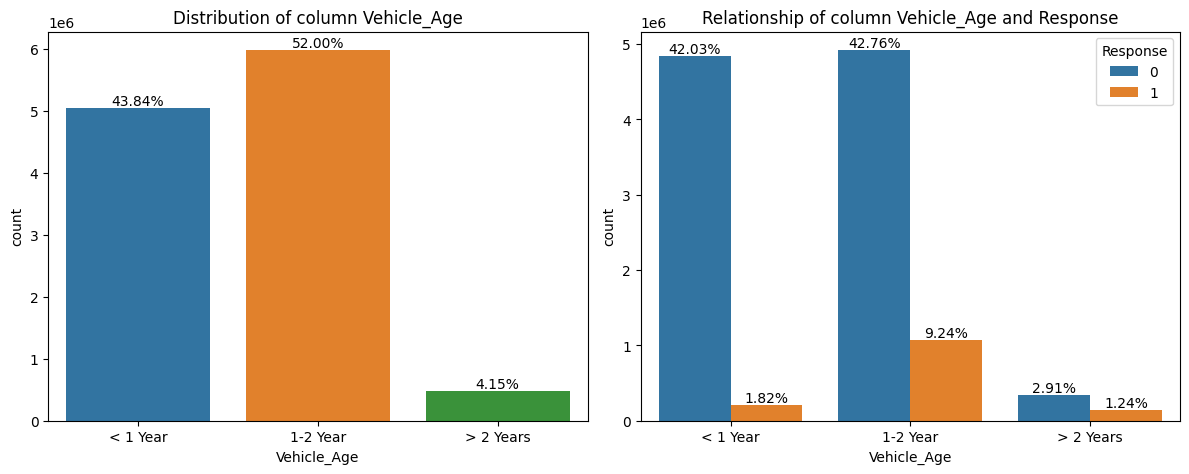

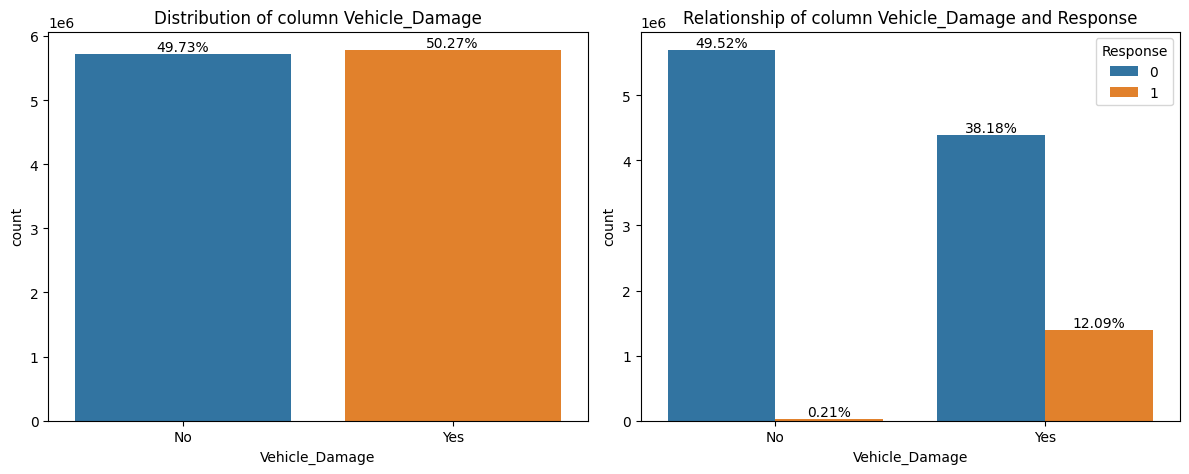

In [8]:
for i in less[:-1]:
    fig, ax = plt.subplots(1, 2, figsize=(12, 5))
    
    # Plotting the first countplot
    sns.countplot(x=i, data=train, ax=ax[0])
    ax[0].set_title(f'Distribution of column {i}')
    
    # Adding percentages on top of the bars for the first countplot
    total = len(train)
    for p in ax[0].patches:
        percentage = f'{100 * p.get_height() / total:.2f}%'
        x = p.get_x() + p.get_width() / 2
        y = p.get_height() + 30 
        ax[0].annotate(percentage, (x, y), ha='center', va='bottom')

    # Plotting the second countplot with hue='Response'
    sns.countplot(x=i, data=train, hue='Response', ax=ax[1])
    ax[1].set_title(f'Relationship of column {i} and Response')
    
    # Adding percentages on top of the bars for the second countplot
    for p in ax[1].patches:
        height = p.get_height()
        total = sum([p.get_height() for p in ax[1].patches if p.get_x() == p.get_x()])  # Total height for this x value
        percentage = f'{100 * height / total:.2f}%' if total > 0 else '0%'
        x = p.get_x() + p.get_width() / 2
        y = p.get_height() + 30
        ax[1].annotate(percentage, (x, y), ha='center', va='bottom')

    plt.tight_layout()
    plt.show()

* Driver License: Although most people have a driver's license, the majority are not interested in responding.
* Previously Insured: The distribution is equal between having or not having vehicle insurance before. Although they don't have vehicle insurance, only 13% of people are interested in responding.
* Vehicle Age: Most of them are not interested in responding.
* Vehicle Damage: The distribution of vehicle damage is similar to that of previously insured.

# Correlation 

<Axes: >

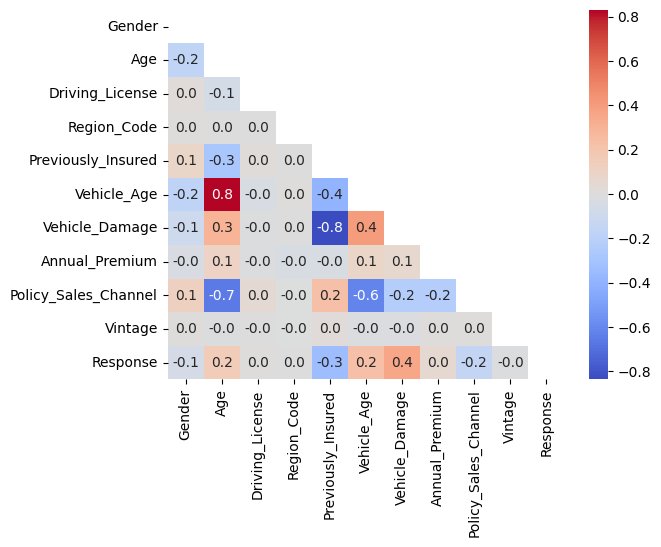

In [9]:
new = train.copy().drop('id',axis=1)
new['Gender'] = new['Gender'].map({'Male':0,'Female':1})
new['Vehicle_Age'] = new['Vehicle_Age'].map({'< 1 Year':0, '1-2 Year':1,'> 2 Years':2})
new['Vehicle_Damage'] = new['Vehicle_Damage'].map({'Yes':1,'No':0})

sns.heatmap(new.corr(method='spearman'),
           mask = np.triu(np.ones_like(new.corr(method='spearman'),dtype=bool)),
           annot=True,cmap='coolwarm',fmt='.1f')

* Vehicle_Age  -----------	Age	0.830604
* Policy_Sales_Channel -----------	Vehicle_Age	-0.619321
* Policy_Sales_Channel -----------	Age	-0.656080
* Vehicle_Damage -----------	Previously_Insured	-0.836214

In [ ]:
new.corr(method='spearman').where(np.tril(np.ones(new.corr(method='spearman').shape), k=-1).astype(bool)).stack().reset_index()

In [ ]:
high_pairs = new.corr(method='spearman').where(np.tril(np.ones(new.corr(method='spearman').shape), k=-1).astype(bool))
high_pairs = high_pairs.stack().reset_index()
high_pairs.columns = ['Feature 1', 'Feature 2', 'Correlation']
high_pairs = high_pairs[(high_pairs['Correlation'] >= 0.5) | (high_pairs['Correlation'] <= -0.5)]

high = high_pairs.sort_values('Correlation',ascending=False)
high

# Mutual Infomation:

In [ ]:
X = new.drop('Response',axis=1)
y = new['Response']

#from sklearn.feature_selection import mutual_info_classif

def make_mi_scores(X, y):
    mi_scores = mutual_info_classif(X, y)
    mi_scores = pd.Series(mi_scores, name="MI Scores", index=X.columns)
    mi_scores = mi_scores.sort_values(ascending=False)
    return mi_scores

mi_scores = make_mi_scores(X, y)
mi_scores

def plot_mi_scores(scores):
    scores = scores.sort_values(ascending=True)
    width = np.arange(len(scores))
    ticks = list(scores.index)
    plt.barh(width, scores)
    plt.yticks(width, ticks)
    plt.title("Mutual Information Scores")


plt.figure(dpi=100, figsize=(15, 8))
plot_mi_scores(mi_scores)

* Policy_Sales_Channel    0.103789
* Region_Code             0.102897
* Age                     0.081696
* Annual_Premium          0.039578
* Vintage                 0.022151

# Relationship between columns

## Driving License vs Vehicle Damage

In [ ]:
new.groupby('Driving_License')['Vehicle_Damage'].value_counts(normalize=True).mul(100).round(2).to_frame()

When they don't have a driving license, they tend to damage the vehicle. However, even if they have a driving license, the chance of vehicle damage is still 50:50.

In [ ]:
new.groupby(['Driving_License','Vehicle_Damage'])['Response'].value_counts(normalize=True).mul(100).round(2).to_frame()

In [ ]:
# new['Driving_License_x_Vehicle_Damage'] = 0
# new.loc[(new['Driving_License'] == 0) & (new['Vehicle_Damage'] == 1), 'Driving_License_x_Vehicle_Damage'] = 8
# new.loc[(new['Driving_License'] == 1) & (new['Vehicle_Damage'] == 1), 'Driving_License_x_Vehicle_Damage'] = 24

When the vehicle is damaged, there is a noticeable increase in interest. For people without a driving license, interest rises from 0.15% to 8%, which is an 8-fold increase. For people with a driving license, interest increases from 0.42% to 24%, which is a 24-fold increase.

## Driving_License vs Previously_Insured

In [ ]:
new.groupby('Driving_License')['Previously_Insured'].value_counts(normalize=True).mul(100).round(2).to_frame()

In [ ]:
new.groupby(['Driving_License','Previously_Insured'])['Response'].value_counts(normalize=True).mul(100).round(2).to_frame()

In [ ]:
# new['Driving_License_x_Previously_Insured'] = 0
# new.loc[(new['Driving_License'] == 0) & (new['Previously_Insured'] == 0) & (new['Response'] == 1), 'Driving_License_x_Previously_Insured'] = 8
# new.loc[(new['Driving_License'] == 1) & (new['Previously_Insured'] == 0) & (new['Response'] == 1), 'Driving_License_x_Previously_Insured'] = 23

When vehicles are uninsured, the observed interest percentage is significantly higher compared to insured vehicles. Specifically, the interest rate is eight times higher for uninsured vehicles without a driving license and twenty-three times higher for uninsured vehicles with a driving license.

## Age_Bins vs Vehicle_Age Correlation = 0.8

In [ ]:
more = [i for i in train.columns if i not in less]
more

fig, ax = plt.subplots(1, 4, figsize=(20, 5))
sns.histplot(x='Age', data=train, bins=7, ax=ax[0])
ax[0].set_title('Distribution of column Age with 7 bins')
sns.histplot(x='Age', data=train, bins=7, ax=ax[1], hue='Response')
ax[1].set_title('Distribution of column Age with 7 bins vs Response')
sns.kdeplot(x='Age', data=train, ax=ax[2])
ax[2].set_title('KDE plot of column Age')
sns.kdeplot(x='Age', data=train, ax=ax[3], hue='Response')
ax[3].set_title('KDE plot of column Age vs Response')

plt.tight_layout()
plt.show()

We can see that when wee divide the Age = 7 bins. The Age have the same distribution 
==> I will create new column to make it faster analysis and easier to understnad.

In [ ]:
new['age_bins'] = pd.cut(new['Age'], bins=7)
new['Age_Type'] = new['age_bins'].cat.codes
new['age_bins'].value_counts(normalize=True).mul(100).round(2)

In [ ]:
new.groupby('Age_Type')['Vehicle_Age'].value_counts(normalize=True).mul(100).round(2).to_frame()

In [ ]:
new.groupby(['Age_Type','Vehicle_Age'])['Response'].value_counts(normalize=True).mul(100).round(2).to_frame()

In [ ]:
sns.boxplot(x='Vehicle_Age', y='Age_Type', data=new)

In [ ]:
sns.boxplot(x='Vehicle_Age', y='Age_Type',hue='Response',data=new)

In [ ]:
new['Age_x_Vehicle'] = new['Age_Type'] * new['Vehicle_Age'].cat.codes
sns.countplot(x='Age_x_Vehicle',hue='Response',data=new)

* In most age bins, younger vehicle ages (0 years) have higher percentages of response 0.
* As vehicle age increases to 2 years, there tends to be a higher percentage of response 1 in most age bins.
* The youngest age bin (19.935 to 29.286) and the oldest age bin (66.429 to 85.0) show relatively high percentages of response 0 for vehicle age 0.
* There is variability in response percentages as vehicle age increases within each age bin.

# Vehicle Damage vs Previously Insured: Corrlation = -0.8

In [ ]:
new.groupby('Vehicle_Damage')['Previously_Insured'].value_counts(normalize=True).mul(100).round(2).to_frame()

In [ ]:
new.groupby(['Vehicle_Damage','Previously_Insured'])['Response'].value_counts(normalize=True).mul(100).round(2).to_frame()

In [ ]:
# new['Vehicle_Damage_x_Previously_Insured'] = 0
# new.loc[(new['Vehicle_Damage'] == 0) & (new['Previously_Insured'] == 0) & (new['Response'] == 1), 'Vehicle_Damage_x_Previously_Insured'] = 3
# new.loc[(new['Vehicle_Damage'] == 1) & (new['Previously_Insured'] == 0) & (new['Response'] == 1), 'Vehicle_Damage_x_Previously_Insured'] = 25

* Only those who got Vehicle Damage and don't have Previously_Insured are interested in Response (25 times)

# Policy Sales Channel vs Age Bins: Correlation   -0.656080

In [ ]:
sns.boxplot(x='Age_Type',y='Policy_Sales_Channel',data=new)

In [ ]:
sns.boxplot(y='Policy_Sales_Channel',x='Age_Type',hue='Response',data=new)

# Policy Sales Channel vs Vehicle Age: Correlation   -0.619

In [ ]:
sns.boxplot(x='Vehicle_Age',y='Policy_Sales_Channel',data=new)

In [ ]:
sns.boxplot(x='Vehicle_Age',y='Policy_Sales_Channel',hue='Response',data=new)

# CONCLUSION:
* **Driving License vs Vehicle Damage**: When the vehicle is damaged, there is a noticeable increase in interest. For people without a driving license, interest rises from 0.15% to 8% ***(8 Times)***. For people with a driving license, interest increases from 0.42% to 24%, ***(24 Times)***.

* **Driving License vs Previously Insured**: When vehicles are uninsured, the observed interest percentage is significantly higher compared to insured vehicles. Specifically, the interest rate is eight times higher for uninsured vehicles without a driving license and twenty-three times higher for uninsured vehicles with a driving license.

* **Age_Bins vs Vehicle_Age**: As vehicle age increases to 2 years, there tends to be a higher percentage of response 1 in most age bins.

* **Vehicle Damage vs Previously Insured**: Only those who got Vehicle Damage and don't have Previously_Insured are interested in Response (25 times)

# Number columns

In [ ]:
num =  ['Annual_Premium','Policy_Sales_Channel', 'Vintage']

for i in num:
    fig, ax = plt.subplots(1, 2, figsize=(12, 5))
    
    # Plotting the first countplot
    sns.boxplot(x=i, data=new, ax=ax[0])
#     ax[0].set_title(f'Distribution of column {i}')
    
    # Plotting the second countplot with hue='Response'
    sns.kdeplot(x=i, data=new, hue='Response', ax=ax[1])

    plt.tight_layout()
    plt.show()

In [ ]:
new['Vintage'].nunique()

# Target Column:

In [ ]:
fig, ax = plt.subplots()
sns.countplot(x='Response', data=train, ax=ax)

# Calculate the total number of instances
total = len(train)

# Add percentages on top of the bars
for p in ax.patches:
    percentage = f'{100 * p.get_height() / total:.2f}%'
    x = p.get_x() + p.get_width() / 2
    y = p.get_height() + 5  # Adjust the position above the bar
    ax.annotate(percentage, (x, y), ha='center', va='bottom')

# Prepare model

In [ ]:
train['age_bins'] = pd.cut(train['Age'], bins=7)
train['Age_Type'] = train['age_bins'].cat.codes

train['Age_x_Vehicle_Age'] = train['Age_Type'] * train['Vehicle_Age'].cat.codes
train['Age_x_Vehicle_Damage'] = train['Age_Type'] * train['Vehicle_Damage'].cat.codes
train['Age_x_Previously_Insured'] = train['Age_Type'] * train['Previously_Insured'].cat.codes
train

In [ ]:
fac_pre = ['Policy_Sales_Channel','Vehicle_Damage','Annual_Premium','Vintage','Age_Type']
col_pre = []
for i in fac_pre:
    train['Previously_Insured_x_'+i] = pd.factorize(train['Previously_Insured'].astype(str) + train[i].astype(str))[0]
    col_pre.append('Previously_Insured_x_'+i)
    
fac_pro = fac_pre[1:]
col_pro = []
for i in fac_pro:
    train['Policy_Sales_Channel_x_'+i] = pd.factorize(train['Policy_Sales_Channel'].astype(str) + train[i].astype(str))[0]
    col_pro.append('Policy_Sales_Channel_x_'+i)

* Define X,y
1. OneHotencoder: Gender, Vehicle_Damage
1. MinMaxScaler: Age, Driving_License, Region_Code, Previously_Insured, Policy_Sales_Channel, Vintage
1. OrdinalEnconder: Vehicle_Age
1. RobustScaler: Annual_Premium
1. StandardScaler: Age_Type, Age_x_Vehicle_Age, Age_x_Vehicle_Damage, Age_x_Previously_Insured

1. Train-Test Split: Split your dataset into training and testing sets.
1. Preprocessing with ColumnTransformer: Apply the necessary preprocessing steps (e.g., scaling, encoding) using ColumnTransformer on the training data.
1. Handling Class Imbalance: Apply SMOTE or undersampling on the preprocessed training data to address class imbalance.


SMOTETomek

In [ ]:
X = train.drop(['id','Response','age_bins'],axis=1)
y = train['Response']

In [ ]:
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder, OrdinalEncoder, RobustScaler, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from sklearn.metrics import roc_auc_score, classification_report, confusion_matrix


X_train, X_test, y_train, y_test = train_test_split(X, y, stratify = y, random_state = 512)

coltrans = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(), ['Gender', 'Vehicle_Damage']),
        ('minmax', MinMaxScaler(), ['Age', 'Driving_License', 'Region_Code', 'Previously_Insured', 'Policy_Sales_Channel', 'Vintage']),
        ('ordinal', OrdinalEncoder(categories=[['< 1 Year', '1-2 Year', '> 2 Years']]), ['Vehicle_Age']),
        ('robust', RobustScaler(), ['Annual_Premium']),
        ('standard', StandardScaler(), ['Age_Type', 'Age_x_Vehicle_Age', 'Age_x_Vehicle_Damage', 'Age_x_Previously_Insured']),
        ('standard_2', StandardScaler(),col_pre+col_pro)
    ],
    remainder='passthrough'  # Keeps columns not specified in transformers
)

In [ ]:
# Column Transformer
X_train_trans = coltrans.fit_transform(X_train)
X_test_trans = coltrans.transform(X_test)

In [ ]:
# Random Under Sample for Majority
rus = RandomUnderSampler(sampling_strategy='auto', random_state=42)
X_resampled, y_resampled = rus.fit_resample(X_train_trans, y_train)

In [ ]:
pd.DataFrame(X_resampled,columns = coltrans.get_feature_names_out())

# Logistic Regression:

In [ ]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(C=0.01, n_jobs=-1, penalty='l1', random_state=512,solver='saga',max_iter=1000)

lr.fit(X_resampled,y_resampled)
y_pred_lr = lr.predict_proba(X_test_trans)
print('ROC_AUC_Score LR train: ',round(roc_auc_score(y_train,lr.predict_proba(X_train_trans)[:,1]) * 100,2))
print('ROC_AUC_Score LR test: ',round(roc_auc_score(y_test,lr.predict_proba(X_test_trans)[:,1]) * 100,2))

# SGD Classifier:

In [ ]:
from sklearn.linear_model import SGDClassifier

sgd = SGDClassifier(random_state=512, loss = 'log_loss')
sgd.fit(X_resampled,y_resampled)
y_pred_sgd = sgd.predict_proba(X_test_trans)

print('ROC_AUC_Score SGD train: ',round(roc_auc_score(y_train,sgd.predict_proba(X_train_trans)[:,1]) * 100,2))
print('ROC_AUC_Score SGD test: ',round(roc_auc_score(y_test,sgd.predict_proba(X_test_trans)[:,1]) * 100,2))

# Decision Tree Classifier:

In [ ]:
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier(max_depth=10, min_samples_leaf=12, min_samples_split=3,random_state=512)
dt.fit(X_resampled,y_resampled)
y_pred_dt = dt.predict_proba(X_test_trans)

print('ROC_AUC_Score Decision Tree train: ',round(roc_auc_score(y_train,dt.predict_proba(X_train_trans)[:,1]) * 100,2))
print('ROC_AUC_Score Decision Tree test: ',round(roc_auc_score(y_test,dt.predict_proba(X_test_trans)[:,1]) * 100,2))

# Random Forest:

In [ ]:
from sklearn.ensemble import RandomForestClassifier

# base_estimator = DecisionTreeClassifier(max_depth=10,min_samples_leaf=12,min_samples_split=3,random_state=512)
rf = RandomForestClassifier(n_estimators=1000, random_state=512,n_jobs=-1,oob_score=True, max_depth=10,min_samples_leaf=12,min_samples_split=3)

# Train the model
rf.fit(X_resampled,y_resampled)

# Predict probabilities
y_pred_rf = rf.predict_proba(X_test_trans)

print('ROC_AUC_Score Random Forest train: ',round(roc_auc_score(y_train,rf.predict_proba(X_train_trans)[:,1]) * 100,2))
print('ROC_AUC_Score Random Forest test: ',round(roc_auc_score(y_test,rf.predict_proba(X_test_trans)[:,1]) * 100,2))

# Out-of-bag score
print('_' * 100)
print("OOB Score: ", rf.oob_score_)

# XGBoost, LightGBM, Catboost

# Voting(voting= 'soft'), # Boosting  # Stacking

# Mlxtend for StackingClassifier:

# Compare ROC:

In [ ]:
# auc = pd.DataFrame()
# auc['LR'] = [round(roc_auc_score(y_test,y_pred_lr[:,1])*100,2)]
# # auc['SVC'] = [round(roc_auc_score(y_test,y_pred_svc[:,1])*100,2)]

# Transforming Test set:

In [ ]:
for i in less[:-1]:
    test[i] = train[i].astype('category')
from pandas.api.types import CategoricalDtype

# Define the new order of categories
new_categories = ['< 1 Year', '1-2 Year', '> 2 Years']

# Create a new CategoricalDtype with the desired order
new_dtype = CategoricalDtype(categories=new_categories, ordered=True)

# Update the 'Vehicle_Age' column with the new dtype
test['Vehicle_Age'] = test['Vehicle_Age'].astype(new_dtype)
test['age_bins'] = pd.cut(test['Age'], bins=7)
test['Age_Type'] = test['age_bins'].cat.codes
test['Age_x_Vehicle_Age'] = test['Age_Type'] * test['Vehicle_Age'].cat.codes
test['Age_x_Vehicle_Damage'] = test['Age_Type'] * test['Vehicle_Damage'].cat.codes
test['Age_x_Previously_Insured'] = test['Age_Type'] * test['Previously_Insured'].cat.codes
test.drop(['id','age_bins'],axis=1,inplace=True)

In [ ]:
fac_pre = ['Policy_Sales_Channel','Vehicle_Damage','Annual_Premium','Vintage','Age_Type']
for i in fac_pre:
    test['Previously_Insured_x_'+i] = pd.factorize(test['Previously_Insured'].astype(str) + test[i].astype(str))[0]
    
fac_pro = fac_pre[1:]
for i in fac_pro:
    test['Policy_Sales_Channel_x_'+i] = pd.factorize(test['Policy_Sales_Channel'].astype(str) + test[i].astype(str))[0]
    
test_trans = coltrans.transform(test)

In [ ]:
best = rf
test['Submit'] = rf.predict_proba(test_trans)[:,1]
test